In [1]:
import pandas as pd
df=pd.read_csv('breastcancer.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [3]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [4]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:>

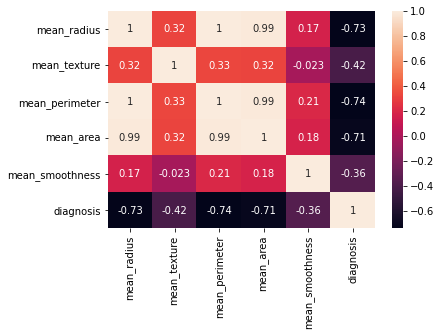

In [6]:
sns.heatmap(df.corr(), annot=True)

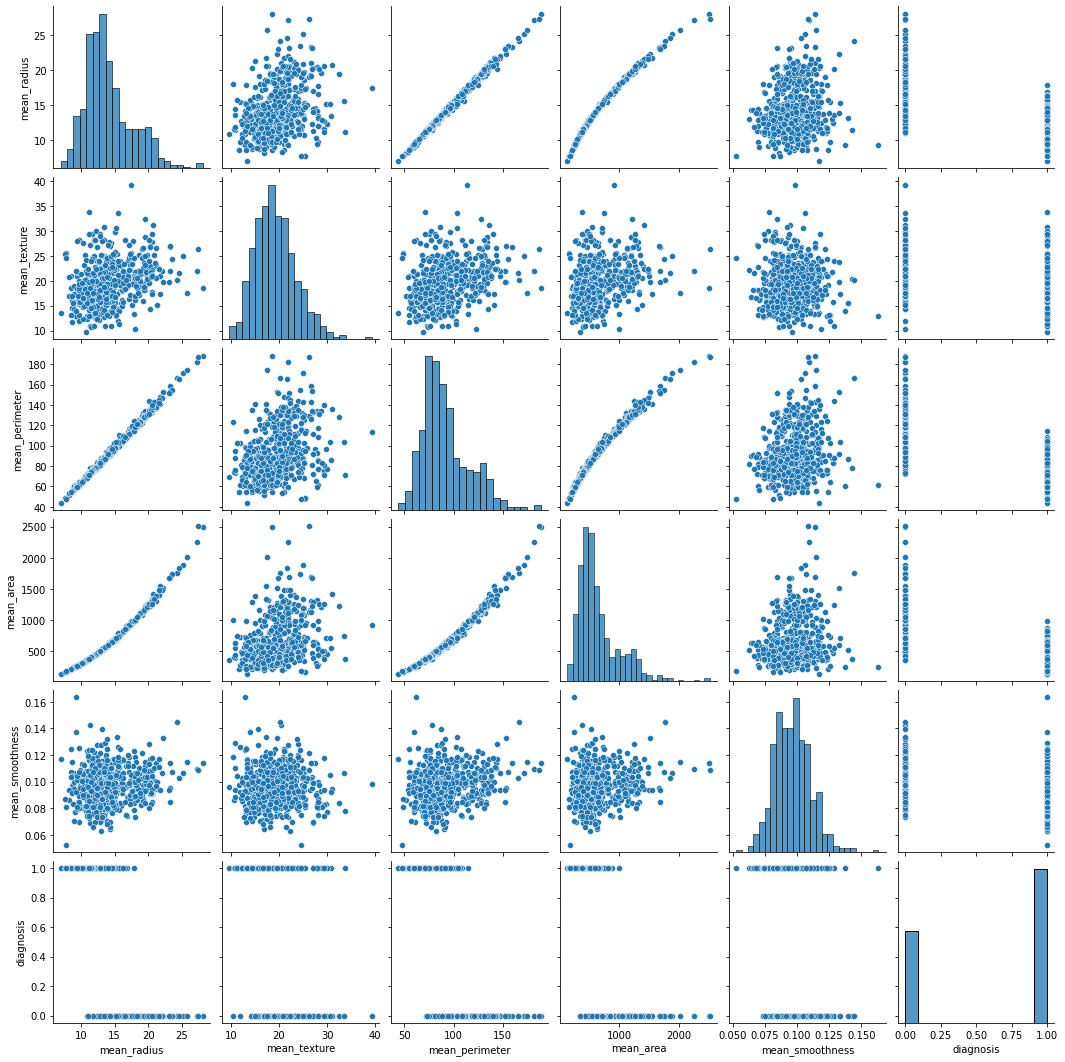

In [7]:
sns.pairplot(df)

## model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix

In [9]:
y=df['diagnosis']

In [10]:
X=df.drop('diagnosis',axis=1)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
## logistic regression
param={'C':[1,10,100]}

lor=LogisticRegression(n_jobs=-1)
random_lor=RandomizedSearchCV(estimator=lor, param_distributions=param)
random_lor.fit(X_train,y_train)
lor_pred=random_lor.predict(X_test)
lor_score=random_lor.score(X_test,y_test)

c:\users\vinay\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [13]:
lor_score

0.9385964912280702

In [14]:
random_lor.best_params_

{'C': 100}

<AxesSubplot:>

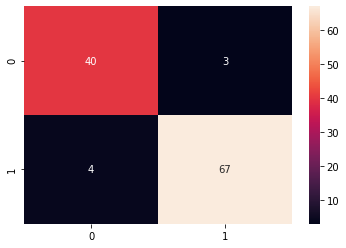

In [15]:
cm_lor=confusion_matrix(y_test,lor_pred)
sns.heatmap(cm_lor, annot=True)

In [16]:
## decision tree

param={'max_depth':np.linspace(1,20,20),
      'min_samples_split':[2,4,6,8],
      'min_samples_leaf':[1,2,3,4,5],
      'ccp_alpha':[0,0.01,0.1,1,10]}

dtc=DecisionTreeClassifier()
random_dtc=RandomizedSearchCV(estimator=dtc, param_distributions=param)
random_dtc.fit(X_train,y_train)
dtc_pred=random_dtc.predict(X_test)
dtc_score=random_dtc.score(X_test,y_test)


In [17]:
dtc_score

0.956140350877193

In [18]:
random_dtc.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': 11.0,
 'ccp_alpha': 0.01}

<AxesSubplot:>

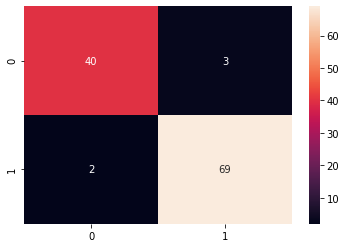

In [19]:
cm_dtc=confusion_matrix(y_test,dtc_pred)
sns.heatmap(cm_dtc, annot=True)

In [20]:
## Random forest

param={'max_depth':np.linspace(1,20,20),
      'min_samples_split':[2,4,6,8],
      'min_samples_leaf':[1,2,3,4,5],
      'ccp_alpha':[0,0.01,0.1,1,10],
      'n_estimators':(np.linspace(100,1000,10)).astype(np.int32)}

rfc=RandomForestClassifier()
random_rfc=RandomizedSearchCV(estimator=rfc, param_distributions=param,n_jobs=-1)
random_rfc.fit(X_train,y_train)
rfc_pred=random_rfc.predict(X_test)
rfc_score=random_rfc.score(X_test,y_test)


In [21]:
rfc_score

0.956140350877193

In [22]:
random_rfc.best_params_

{'n_estimators': 900,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 6.0,
 'ccp_alpha': 0}

<AxesSubplot:>

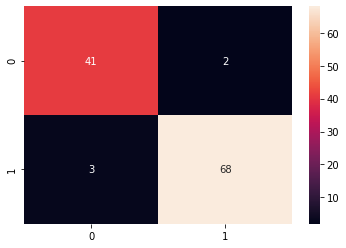

In [23]:
cm_rfc=confusion_matrix(y_test,rfc_pred)
sns.heatmap(cm_rfc, annot=True)

In [24]:
## SVC

param={'C':[0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]}

svc=SVC()
random_svc=RandomizedSearchCV(estimator=svc, param_distributions=param,n_jobs=-1)
random_svc.fit(X_train,y_train)
svc_pred=random_svc.predict(X_test)
svc_score=random_svc.score(X_test,y_test)


In [25]:
svc_score

0.9385964912280702

In [26]:
random_svc.best_params_

{'gamma': 0.001, 'C': 1}

<AxesSubplot:>

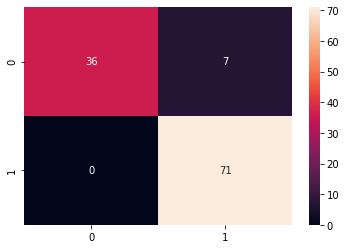

In [27]:
cm_svc=confusion_matrix(y_test,svc_pred)
sns.heatmap(cm_svc, annot=True)

In [28]:
## naive bayes
## gaussian


gau=GaussianNB()

gau.fit(X_train,y_train)
gau_pred=gau.predict(X_test)
gau_score=gau.score(X_test,y_test)

In [29]:
gau_score

0.9385964912280702

<AxesSubplot:>

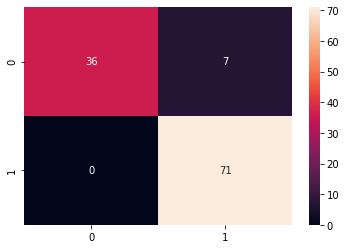

In [30]:
cm_gau=confusion_matrix(y_test,gau_pred)
sns.heatmap(cm_gau, annot=True)

In [31]:
## multinomial

mul=MultinomialNB()

mul.fit(X_train,y_train)
mul_pred=mul.predict(X_test)
mul_score=mul.score(X_test,y_test)

In [32]:
mul_score

0.8859649122807017

<AxesSubplot:>

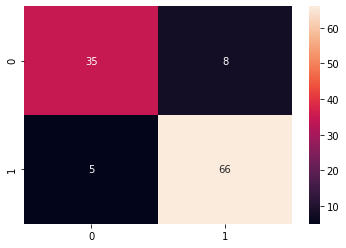

In [33]:
cm_mul=confusion_matrix(y_test,mul_pred)
sns.heatmap(cm_mul, annot=True)

In [34]:
models=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','Naive Bayes']
score=[lor_score,dtc_score,rfc_score,svc_score,gau_score]
        

In [35]:
score

[0.9385964912280702,
 0.956140350877193,
 0.956140350877193,
 0.9385964912280702,
 0.9385964912280702]